# Project: Investigate a Feature Length Movie Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll examine **medium to high budget feature films**. The dataset I'll use comes from IMDB and has data of more than 10 thousand movies, as diverse as films with 0 dollars of budget to extremely high budget films; from a bunch short movies to the longest film ever made (900 minutes). The reason I chose to focus on feature-length, medium to high budget movies will be explained throughout this project.

The main goal of this project is to investigate the general trends of budget, revenue and return on investment throughout the years; if the popularity of a movie is reflected in the revenues; if there is a relation between the genres of the most popular movies by year with the most commons movie's genres; and finally, what are the difference between high score movies and low score ones.


In [1]:
# Import packages
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

First, let's take a general look at the dataframe.

In [2]:
# Read data and see the first 3 rows.
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Get general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

As we can see, this dataset has 10866 entries. The type for each column seems fine.

In [4]:
# Look for duplicates
sum(df.duplicated())

1

There are some things worth mentioning about this df.
1. There are some columns that are not important for our goals. For example id, imdb_id, homepage, etc., won't really help us find useful information.
2. There are some rows with null values. I will handle them after I drop the columns that I'm not interested in.
3. There is a duplicated column.

In [5]:
# Let's use some descriptive statistics to find more about this dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Using .describe() shows us that there are some movies with a runtime of 0 minutes. Is this an error? Does it refer to short movies that have a runtime less than a minute? How many movies there are with this small runtime?

Likewise, there is a movie with a runtime of 900 minutes. This is not necessarily an error, but it seems like an outlier.

Other "problem" can be budget. The .50 percentile of the movies on this dataset has a budget of almost 0 dollars.

I think that really low or really high runtime movies are outliers that can mess up the conclusions. Likewise, even if is completely ok to have data of low-budget movies, having as much as half of the dataset with this kind of movie can lend us to have some distortion in our conclusions.

I'll think about a way to handle these problems later. Let's keep learning about the df.

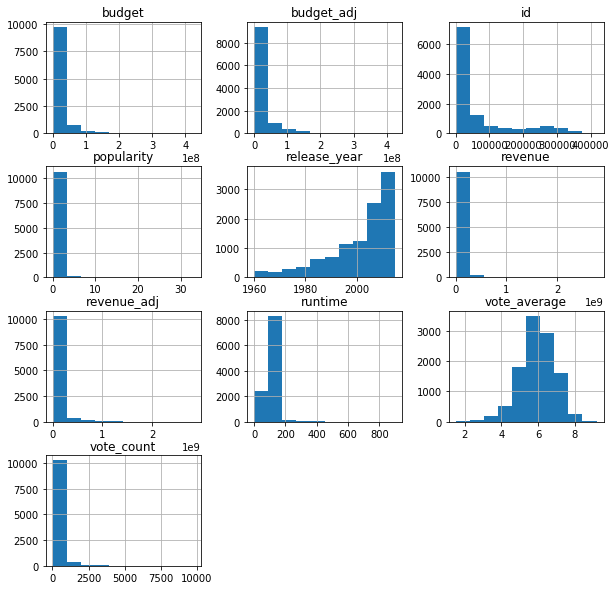

In [6]:
# I'll plot histograms to have a general look of the distribution of all the numerical data.
df.hist(figsize = (10, 10));

In these histograms, we can observe that many of them are completely skewed to the right. I suspect this is correlated with the diversity of movies we find in this dataset (really long/short movies, really high and really low budgets, etc.)

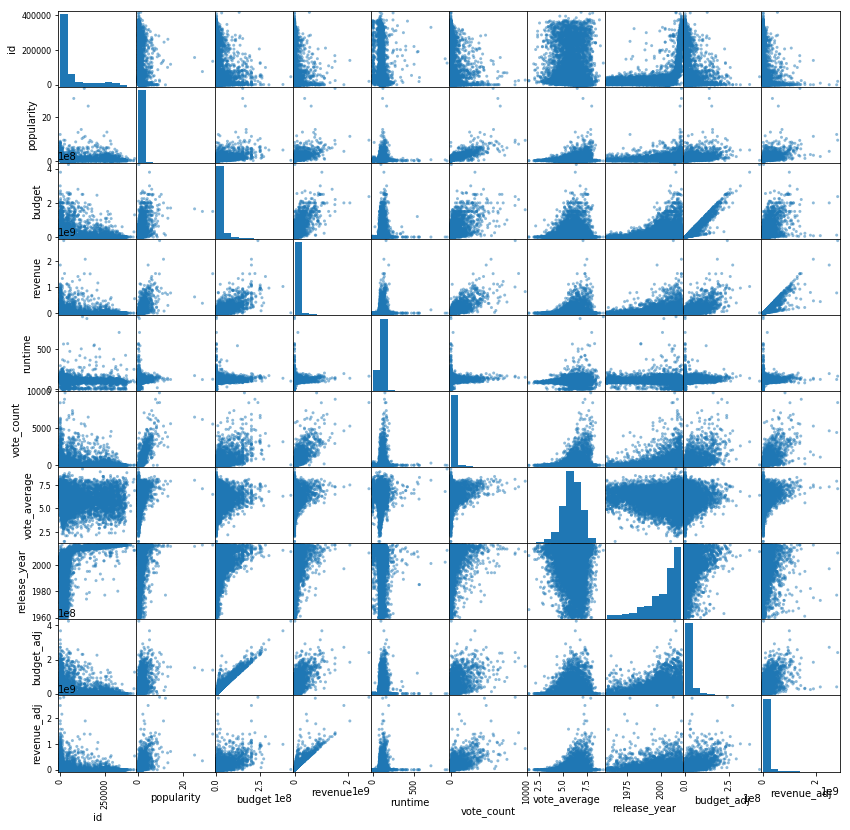

In [7]:
# Now, I'll plot scatter charts to see the relation between two variables.
pd.plotting.scatter_matrix(df, figsize = (14, 14));

In this first look, we see some interesting relations, like the positive correlation between `revenue_adj` and `vote_average`. About the goals of this project, we can observe what it seems to be a positive correlation between `budget_adj` and `revenue_adj`. I'll look more about it when I finish cleaning the data.

I'm interested in all the single genres there are in this dataset. With the next code cell I'll find them:

In [8]:
# First, I'll separate those single strings representing many genres separated by "|" using .str.split('|')
# For example, this will transform "action|adventure" to ["action", "adventure"]
column_genres_splited = df["genres"].str.split('|')

# Now, I'll transform this to a pandas Series. So, instead of having just one column with lists as elements, we'll have
# many columns, each column with one genre. 
# (Using type(), I saw that it transforms pandas.core.series.Series to pandas.core.frame.DataFrame)
one_column_for_one_genre = column_genres_splited.apply(pd.Series)

# Now I'll use .stack() This will transform one row with mutliple columns into one row with multiple sub rows
# and just one column .
stacked = one_column_for_one_genre.stack()

# Having this, now I can use unique()
stacked.unique()

# I could just use df["genres"].str.split('|').apply(Series).stack().unique(); I didn't because I want to explain
# to my future self what's going on in each step.

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

### Data Cleaning

As we see in this last section, there are some things we need to correct in order to get sound conclusions. We need to drop duplicates and rows with nan values, drop useless columns and decide what to do with some outliers in the data we are interested, for example extremely short or long movies.

First, I'll drop the columns I'm not interested in.

In [9]:
# Drop columns and check if they were dropped.
df.drop(["id", "imdb_id", "homepage", "tagline", "overview", "keywords", "cast", "production_companies"], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In the Data Wrangling section, I noted that there are some extreme values at runtime, where some movies have a runtime as low as 0 minutes and as high as 900 minutes. I want to see all the unique values in runtime and their distribution, so I can decide what I can do about it.

In [10]:
# Unique values in runtime
np.sort(df["runtime"].unique())

array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  36,  38,  40,  41,  42,
        43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 18

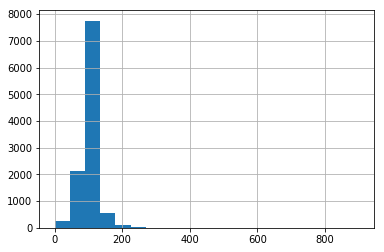

In [11]:
# Distribuiton on runtime unique values
df["runtime"].hist(bins=20);

In [12]:
# Get the .025 and .975 quantile to have a general look of what are one of the lowest and highest runtime
# in the distribution.
print(".025 runtime quantile:", df["runtime"].quantile(.025))
print(".975 runtime quantile:", df["runtime"].quantile(.975))

.025 runtime quantile: 45.0
.975 runtime quantile: 157.375


As we can observe here, there are movies with a runtime of more than 180 minutes (3 hours!), but they're not that common, so it doesn't show in the histogram. They are so rare that even the .975 quantile is "only" 157 minutes.

Likewise, there are some short movies too. Like those with really long movies, they're not that common neither.
Knowing this, I'll do the next:

Knowing this, I'll do the next:
1. I will limit the runtime to be no less than 40 minutes. This way, I'll analyze what the American Academy considers a [feature-length film](https://www.oscars.org/sites/oscars/files/91th-general_entry_submission_requirements.pdf).
2. The upper limit will be 250 minutes. I was thinking about setting the upper limit to 160 minutes (the .975 quantile), but I found that I would be filtering popular movies like Titanic and The Lord of the Rings. I will limit to 250 because longer movies are actually series, like The Pacific.

In [13]:
# Set upper and lower runtime limits using query
feature_df = df.query("runtime >= 40")
feature_df = feature_df.query("runtime <= 250")

My other concern is budget. There may be movies with extremely low budgets as 1000 dollars, but 0 dollars? That seems like an error or like data is missing. In order to avoid any distortion because low budget movies, I'll limit to analyze only movies with budgets of more than $10000

In [14]:
# Limit budget to be no less than 10000.
feature_df = feature_df.query("budget >= 10000")

At the same time, having movies with 0 of revenue doesn't seem right. Some of those movies are popular ones, like "New York Stories". I will filter all movies with a revenue of 0. 

In [15]:
# Limit budget to be more than 0.
feature_df = feature_df.query("revenue > 0")
feature_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3828.000000,3.828000e+03,3.828000e+03,3828.000000,3828.000000,3828.000000,3828.000000,3.828000e+03,3.828000e+03
mean,1.196759,3.745873e+07,1.083799e+08,109.223615,530.741902,6.168730,2001.273511,4.454189e+07,1.379194e+08
std,1.478599,4.223911e+07,1.769272e+08,19.478359,882.105637,0.794985,11.284161,4.481224e+07,2.165633e+08
min,0.001117,1.000000e+04,2.000000e+00,42.000000,10.000000,2.200000,1960.000000,1.577503e+04,2.370705e+00
25%,0.464715,1.000000e+07,1.400000e+07,96.000000,72.000000,5.700000,1995.000000,1.336182e+07,1.879153e+07
50%,0.802740,2.400000e+07,4.565877e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.230869e+07
75%,1.379884,5.000000e+07,1.249894e+08,119.000000,582.250000,6.700000,2010.000000,6.076720e+07,1.646753e+08
max,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Everything seems fine.


Now that I have this defined, I'll drop the columns with null values and the duplicated one. I didn't do it before as I thought that with all the filtering I did before, maybe I would rid off those rows.

In [16]:
# Drop null values and check if those rows were dropped.
feature_df.dropna(inplace = True)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3827 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3827 non-null float64
budget            3827 non-null int64
revenue           3827 non-null int64
original_title    3827 non-null object
director          3827 non-null object
runtime           3827 non-null int64
genres            3827 non-null object
release_date      3827 non-null object
vote_count        3827 non-null int64
vote_average      3827 non-null float64
release_year      3827 non-null int64
budget_adj        3827 non-null float64
revenue_adj       3827 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 418.6+ KB


In [17]:
# Drop duplicates rows
feature_df.drop_duplicates(inplace=True)

Now there aren't any duplicated rows nor missing values.

Now, let's add some columns that will be useful for this investigation's goals.

First, I need a return on investment (ROI) column. This is simple to do:

In [18]:
# Create ROI column and check if it was correctly created.
feature_df["ROI"] = (feature_df["revenue_adj"] - feature_df["budget_adj"])/ feature_df["budget_adj"]
feature_df.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,9.090192
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,1.522909
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.683984


Now, I want to have a way to find  what genres is each movie. Having multiple columns called genres is not a good idea, as there are movies with only one genre and movies with as many as five genres.

I'll rather add many columns with all the genres there are. If a movie is a genre of a particle column, it will show 1. If not, it will show 0.

In [19]:
# Create a new dataset counting which genres a certain movie is.
feature_df_genres = feature_df['genres']
# extract dummy variables from string columns
only_genres = feature_df_genres.str.get_dummies(sep="|")

# Check if everything is fine
only_genres.tail()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
10822,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10828,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10829,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10835,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10848,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
# Check again our new df using statistics, histograms and scatter matrix.
feature_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI
count,3826.000000,3.826000e+03,3.826000e+03,3826.000000,3826.000000,3826.000000,3826.000000,3.826000e+03,3.826000e+03,3826.000000
mean,1.197190,3.746938e+07,1.084334e+08,109.216675,530.987716,6.169132,2001.269472,4.455622e+07,1.379883e+08,10.162694
std,1.478856,4.224656e+07,1.769579e+08,19.468596,882.269939,0.794946,11.285704,4.481859e+07,2.165989e+08,263.737176
min,0.001117,1.000000e+04,2.000000e+00,42.000000,10.000000,2.200000,1960.000000,1.577503e+04,2.370705e+00,-1.000000
25%,0.465003,1.000000e+07,1.401073e+07,96.000000,72.000000,5.700000,1995.000000,1.337234e+07,1.890490e+07,-0.127008
50%,0.802777,2.400000e+07,4.570828e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.237149e+07,1.116112
75%,1.379977,5.000000e+07,1.251384e+08,119.000000,582.750000,6.700000,2010.000000,6.076720e+07,1.646962e+08,3.201646
max,32.985763,4.250000e+08,2.781506e+09,248.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12889.386667


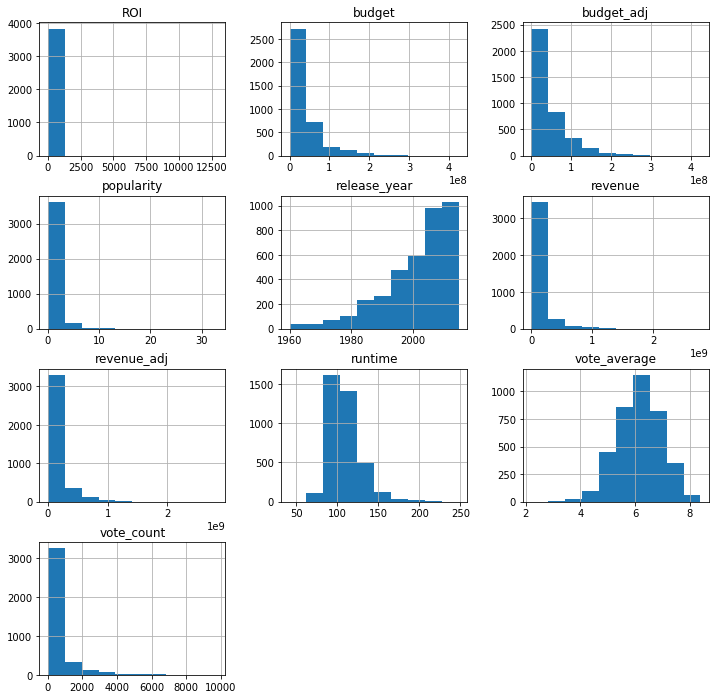

In [21]:
feature_df.hist(figsize=(12, 12));

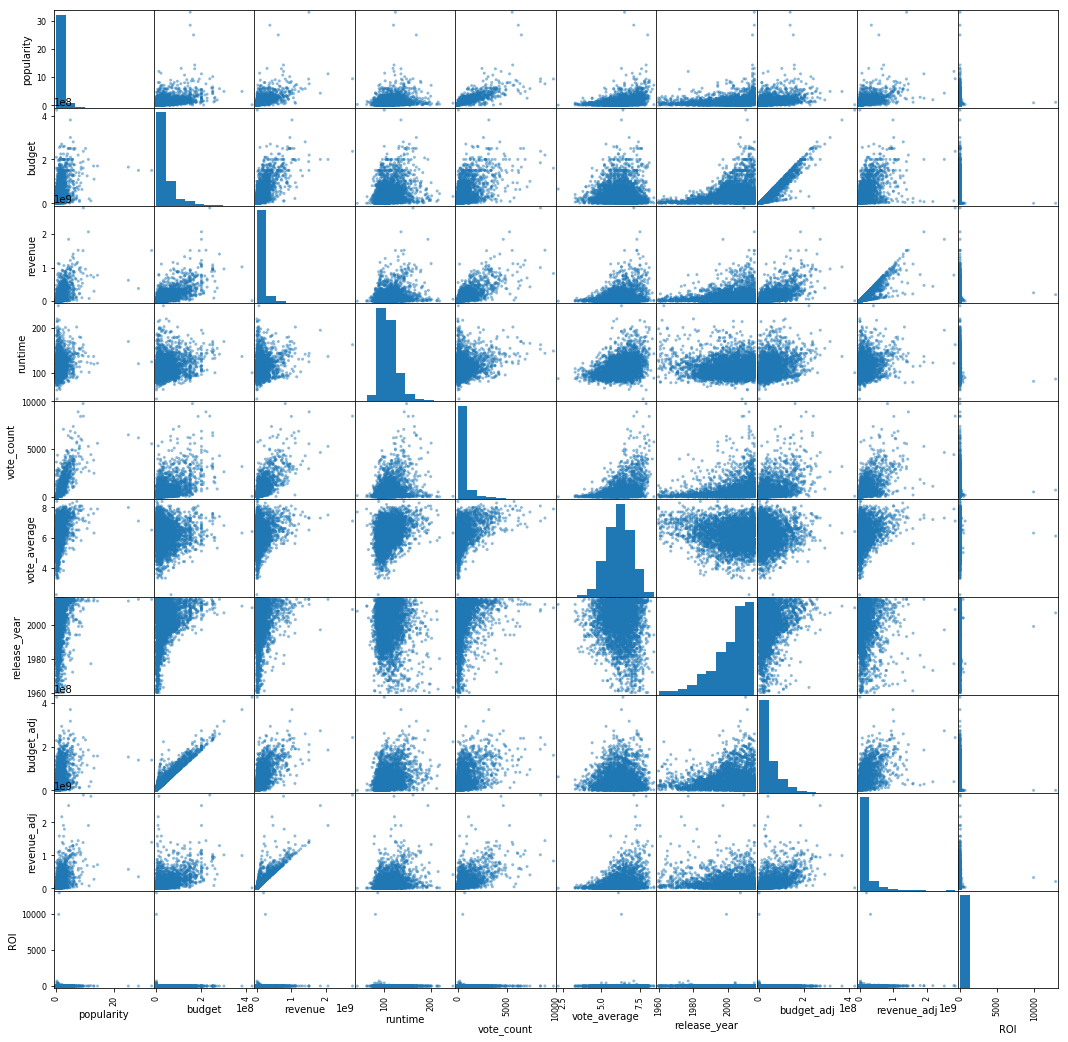

In [22]:
pd.plotting.scatter_matrix(feature_df, figsize = (18, 18));

<a id='eda'></a>
## Exploratory Data Analysis

### How Budget, Revenue and ROI have evolved over the years?

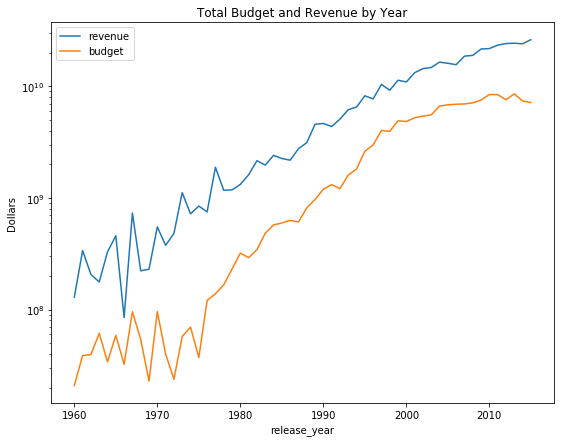

In [23]:
# Sum revenue and budget columns grouped by years and plot them.
feature_df.groupby("release_year").sum()["revenue"].plot(logy=True, legend=True, figsize = (9, 7))
feature_df.groupby("release_year").sum()["budget"].plot(logy=True, legend=True, figsize = (9, 7), 
                                                        title="Total Budget and Revenue by Year")
# set Y label
plt.ylabel('Dollars');

As we can see in this chart, the budget and revenue have been growing steadily over the years. But how is this related to the ROI?

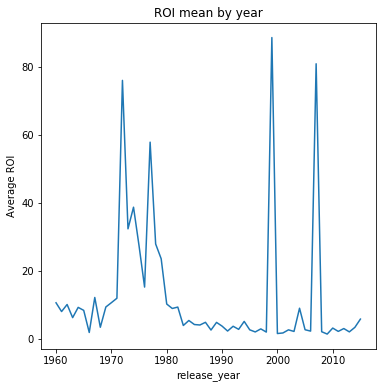

In [24]:
# Get ROI mean by year and plot it.
means_by_year = feature_df.groupby("release_year").mean()
means_by_year["ROI"].plot(figsize=(6, 6), title="ROI mean by year")
plt.ylabel('Average ROI');


The last chart shows the ROI mean for every year. We can see that generally, this has maintained levels between 0 and 5, with three unusual peaks at the beginnings of the 70's, end of the 90's and 00's. The 70's in general has a high ROI. What has happened in this 3 periods? Why does the 70's have such a high ROI?

In [25]:
# I'll print the mean and median of the ROI to have a reference point when comparing it to outliers.
print("ROI median =",feature_df["ROI"].median())
print("ROI mean =",feature_df["ROI"].mean())

# Output feature_df sorted by biggest ROI
feature_df.sort_values("ROI", ascending = False).head()

ROI median = 1.1161118594164536
ROI mean = 10.162693722505523


,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI
7447,1.120442,15000,193355800,Paranormal Activity,Oren Peli,86,Horror|Mystery,9/14/07,714,6.1,2007,15775.028739,2.033462e+08,12889.386667
2449,0.934621,25000,248000000,The Blair Witch Project,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,7/14/99,522,6.3,1999,32726.321165,3.246451e+08,9919.000000
1354,0.331417,10000,7000000,Eraserhead,David Lynch,89,Science Fiction|Fantasy|Horror|Drama,3/19/77,194,7.1,1977,35977.810326,2.518447e+07,699.000000
7277,0.412913,12000,6000000,Pink Flamingos,John Waters,93,Comedy,3/12/72,51,6.3,1972,62574.731176,3.128737e+07,499.000000
7178,0.263897,65000,28575078,Super Size Me,Morgan Spurlock,100,Documentary|Comedy|Drama,1/17/04,295,6.5,2004,75038.950988,3.298837e+07,438.616585


Let's consider that the ROI median is of 1.12 and the mean is 9.98

As we can see, in 2007, Paranormal Activity had an explosive ROI of 12889.38, obtaining revenues (adjusted) of 200 million dollars with a budget (adjusted) of only $ 15000.

Another impressive ROI was achieved by The Blair Witch Project in 1999, with a ROI of 9919.

Given that these outliers can distort the data, I will filter them by finding the Z score of each element in the ROI column and filtering those whose Z score is greater than 3.

I don't know yet what's going on with the 70's, precisely the peak of 1972.

In [26]:
# Get Z score
z_score = np.abs(stats.zscore(feature_df["ROI"]))

# Add new column called ROI_z_score
feature_df["ROI_z_score"] = z_score  

# Drop those rows with a Z score equal or more than 3
feature_df_ol = feature_df.query("ROI_z_score < 3")

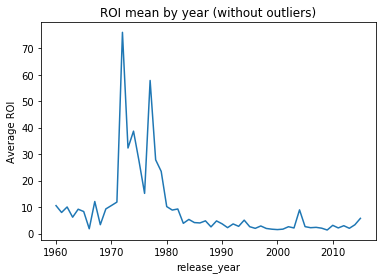

In [27]:
# Get mean of ROI by year
feature_df_roi_ol_mean = feature_df_ol.groupby("release_year").mean()

# Plot it
feature_df_roi_ol_mean["ROI"].plot(title="ROI mean by year (without outliers)")
plt.ylabel('Average ROI');


By filtering the outliers we obtain a cleaner graphic, without the extreme peaks we previously saw, but still with periods of unusually high ROI in the 70s and early 80s.

In order to understand what's going on, I'll use descriptive statistics for each year's ROI. I'll plot the min and the .25 quantile for each year's ROI.

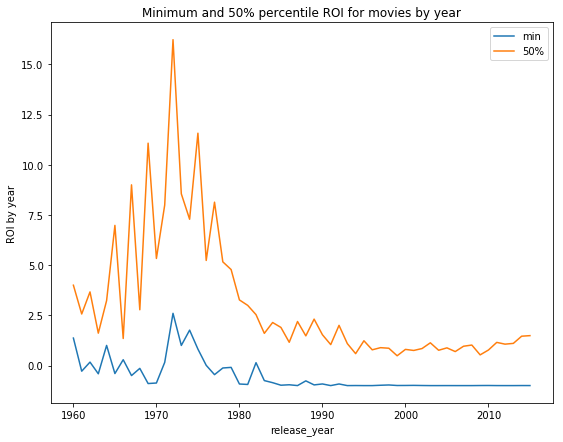

In [28]:
# Plot the min and the .25 quantile for each year's ROI
feature_df_ol.groupby("release_year").describe()["ROI"]["min"].plot(legend=True, figsize=(9, 7));
feature_df_ol.groupby("release_year").describe()["ROI"]["50%"].plot(legend=True, figsize=(9, 7), title = 
                                                                   "Minimum and 50% percentile ROI for movies by year");
plt.ylabel('ROI by year');

This explains it all. In the 70's, the minimum ROI were pretty high compared to others year.

In order to get a better conclusion, I will plot two graphs showing ROI trends before and after 1982.

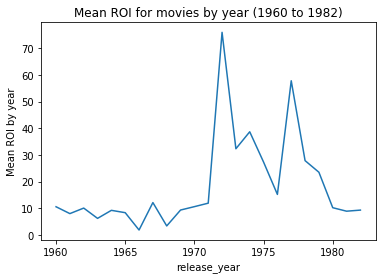

In [29]:
# Get yearly mean ROI until 1982
feature_df_ol_mean_80s_beyond = feature_df_roi_ol_mean.query("release_year <= 1982")

# Plot it
feature_df_ol_mean_80s_beyond["ROI"].plot(title = "Mean ROI for movies by year (1960 to 1982)")
plt.ylabel('Mean ROI by year');

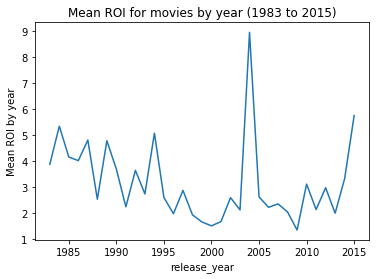

In [30]:
# Get yearly mean ROI from 1983 and plot it
feature_df_ol_mean_80s_beyond = feature_df_roi_ol_mean.query("release_year > 1982")
feature_df_ol_mean_80s_beyond["ROI"].plot(title = "Mean ROI for movies by year (1983 to 2015)");
plt.ylabel('Mean ROI by year');

I'll comment about my findings in the Conclusion section.

### Does a higher popularity means a higher ROI and Revenue?

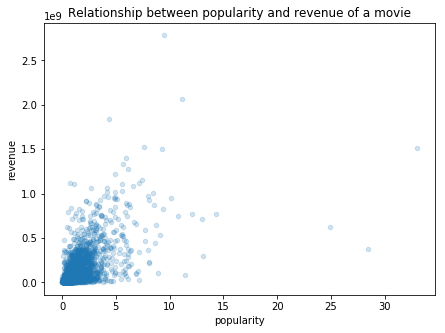

In [31]:
# See the relationship between popularity and revenue for individual movies.
feature_df_ol.plot(x="popularity", y="revenue", kind="scatter", alpha=0.2, 
                   title="Relationship between popularity and revenue of a movie", figsize = (7, 5));

There seems to be a weak positive correlation between popularity and revenue.

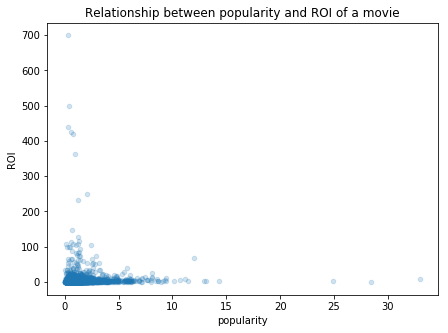

In [32]:
# See the relationship between popularity and ROI for individual movies.
feature_df_ol.plot(x="popularity", y="ROI", kind="scatter", alpha=0.2,
                  title="Relationship between popularity and ROI of a movie", figsize = (7, 5));

But this is not necessarily true between popularity and ROI. In fact, many movies with great ROI have low levels of popularity.

### Is there any relationship between the most common movie genres with the genres of the most popular movies each year?

First, I'll join `feature_df` to `only_genres`.

In [33]:
# Join feature_df to only_genres
feature_df_and_genres = feature_df.join(only_genres)

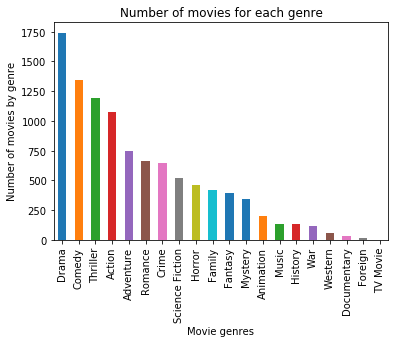

In [34]:
# Get only genres col and sum each col to see most common movie genres. Then, plot it.
feature_df_only_genres = feature_df_and_genres.iloc[:, 15:35]
feature_df_only_genres.sum().sort_values(ascending=False).plot(kind="bar", title="Number of movies for each genre")
plt.ylabel('Number of movies by genre')
plt.xlabel('Movie genres')

# I'll get the indexes of this plot in order to use it in the plot of the next code cell. 
# This way, the next plot will be sorted the same way this plot is, so we'll be able to quickly compare
# both charts.
indexes = feature_df_only_genres.sum().sort_values(ascending=False).index

The previous graphic shows us the total number of films for each genre.

Now, I want to find the most popular movies by year and plot a similar graph.

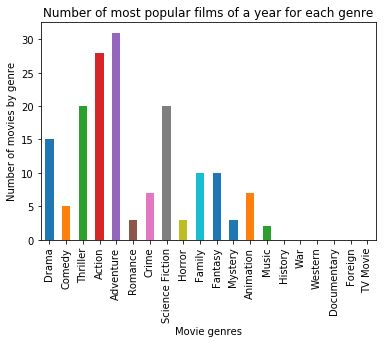

In [35]:
# I'll group by "release_year" and then find the movie with the highest popularity by year using .idxmax()
movies_highest_popularity_by_year = feature_df_and_genres.loc[feature_df_and_genres.groupby("release_year")["popularity"].idxmax()]

# Now, I'll get only genres columns, sum each column and plot it.
popular_df_only_genres = movies_highest_popularity_by_year.iloc[:, 15:35]
popular_df_only_genres.sum()[indexes].plot(kind="bar", title="Number of most popular films of a year for each genre");
plt.ylabel('Number of movies by genre')
plt.xlabel('Movie genres');

It doesn't seem like there is a relationship. I'll write more about this in the conclusion section.

### How a movie with a high vote average (7.5 or more) differs from those with lowers vote average?

In [36]:
# Get movies with score of 7.5 or higher, and those under 7.5
highest_score = feature_df.query("vote_average >= 7.5")
rest = feature_df.query("vote_average < 7.5")

# Subtract the results between highest_score.describe() and rest.describe() to see the differences.
highest_score.describe() - rest.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI,ROI_z_score
count,-3460.000000,-3.460000e+03,-3.460000e+03,-3460.000000,-3460.000000,-3460.000000,-3460.000000,-3.460000e+03,-3.460000e+03,-3460.000000,-3460.000000
mean,2.165560,3.420359e+06,1.312617e+08,17.431281,1551.218999,1.606047,-3.686224,4.373735e+06,1.865773e+08,-2.972564,-0.031780
std,1.780009,1.279965e+07,1.513037e+08,9.922056,1053.353801,-0.536914,4.486595,7.497809e+06,1.973309e+08,-259.783017,-0.995378
min,0.065387,1.900000e+05,1.000000e+00,-21.000000,12.000000,5.300000,0.000000,1.867823e+05,6.676546e-01,0.000015,0.000195
25%,0.761422,-4.000000e+06,1.884783e+07,11.000000,564.000000,1.900000,-9.000000,-7.708485e+05,3.134838e+07,2.063723,-0.009288
50%,1.690570,-6.000000e+06,5.103274e+07,18.000000,1515.000000,1.500000,-3.000000,1.142292e+05,8.644027e+07,2.687206,-0.008612
75%,2.992078,4.500000e+06,2.000072e+08,22.500000,2330.000000,1.200000,1.000000,3.967806e+06,2.730886e+08,5.321991,-0.004840
max,-8.036629,-1.750000e+08,-7.133276e+08,-32.000000,864.000000,1.000000,0.000000,-1.875639e+08,-3.741151e+07,-12819.895939,-48.614958


There are some clear differences I'll write about in conclusions.

<a id='limitations'></a>
## Limitations 

The most important limitation was some missing or erroneous data in the dataset. For example, I had to drop all the movies that had a 0 revenue. There may be some Movies that didn't generate no revenues at all (for example non released movies), but there are some popular movies with 0 revenue too, like Woody Allen's New York Stories. Dropping those movies with 0 revenue may have helped avoiding some errors, but we can't be sure if there are any other errors in the data.

Apart from this problem, the rest of the dataset seems to be fine. There were lots of columns with interesting data, I didn't need to correct any type of data, and it was the biggest dataset I've worked with so far.

<a id='conclusions'></a>
## Conclusions

About the first question **how Budget, Revenue and ROI have evolved over the years?**, we can observe that budget and ROI have been growing steadily over the years. This means, movies are making more revenue than ever before, but at the same time need more budget.

ROI is another story. There are some movies who had an explosive ROI thanks to being able to collect hundred of millions of dollars with only thousands of dollars in budget (for example, Paranormal Activity). Excluding these outliers, we can observe that generally, ROI from movies released in the 60's and 70's tend to be higher than those released from the 80's to now. The 70's is a period with unusual high ROI. It seems this occurred because, in this dataset, even the movies with the lowest ROI for each year in the 70's were much higher than the mean ROI of movies of others years.

About the second question **does a higher popularity means a higher ROI and Revenue?**, there seems to be a positive correlation between popularity and revenue. On the other hand, this is not exactly the case with popularity and ROI. Actually, many of the movies with the highest ROI are at the lowest level of popularity.

About our third question **Is there any relationship between the most common movie genres with the genres of the most popular movies each year??**, this is a clear no. The most common genres are (in order) Drama, Comedy, Thriller, Action and Adventure. On the other hand, the genres of the most popular movies are Adventure, Action, Thriller, Science Fiction and Drama.

Finally, about **how a movie with a high vote average (7.5 or more) differs from those with lowers vote average?**, we find that higher voted average movies tend to be more popular, have a higher budget, revenue and runtime; be older and finally have a lower ROI than those movies with lowers vote average.